In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWgT3VkvFffktDfXQnCEHW1fG3rAg6t6ahllEt-bI5xRojXW1Q_hS-0
Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/Colab Notebooks/Emergency vs Non-Emergency Vehicle Classification'

/content/drive/MyDrive/Colab Notebooks/Emergency vs Non-Emergency Vehicle Classification


## 1. Loading Libraries

In [4]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Dense, InputLayer
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Using TensorFlow backend.


## Load Data

In [5]:
data = pd.read_csv('Dataset/emergency_classification.csv')

In [6]:
seed = 42
rng = np.random.RandomState(seed)

In [7]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [ ]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)
    
# converting the list of images into array
X = np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [ ]:
# shape of the image
X.shape

(2352, 224, 224, 3)

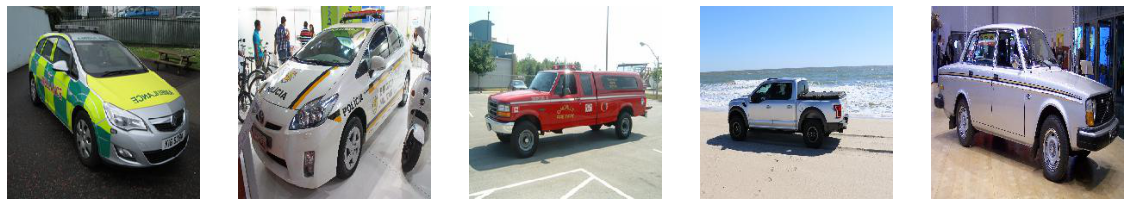

In [ ]:
# visualizing images
fig,ax = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

## 2. Pre-processing the data

In [ ]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], -1)
X.shape

(2352, 150528)

In [ ]:
# minimum and maximum pixel values of images
X.min(), X.max()

(0, 255)

In [ ]:
# normalizing the pixel values
X = X / X.max()

In [ ]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 3. Creating training and validation set

In [ ]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X, y, test_size=0.3, random_state=seed)

In [ ]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 4. Defining the model architecture

In [ ]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [ ]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 6. Training the model

In [ ]:
# training the model
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.8249 - accuracy: 0.5844 - val_loss: 0.6485 - val_accuracy: 0.6516
Epoch 2/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6495 - accuracy: 0.6148 - val_loss: 0.6287 - val_accuracy: 0.6714
Epoch 3/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6303 - accuracy: 0.6458 - val_loss: 0.6242 - val_accuracy: 0.6501
Epoch 4/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6172 - accuracy: 0.6768 - val_loss: 0.6059 - val_accuracy: 0.6926
Epoch 5/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6198 - accuracy: 0.6689 - val_loss: 0.6154 - val_accuracy: 0.6643
Epoch 6/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5935 - accuracy: 0.6981 - val_loss: 0.6306 - val_accuracy: 0.6431
Epoch 7/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6013 - accu

## 7. Evaluating model performance

In [ ]:
# getting predictions in the form of class as well as probabilities
predictions = model.predict_classes(X_valid)[:,0]
prediction_probabilities = model.predict(X_valid)[:,0]

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.7096317280453258 %


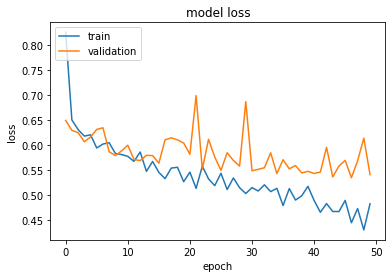

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

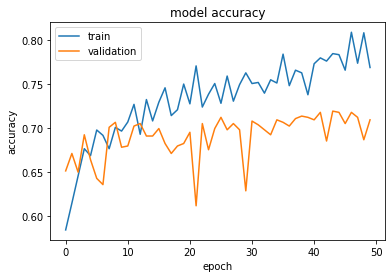

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model is 26 % sure that it is emergency
And actual class is  0


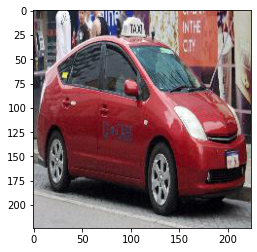

In [ ]:
# pull out the original images from the data which correspond to the validation data
_, valid_vehicles, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_vehicles)))

# get the corresponding image name and probability
img_name = valid_vehicles[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('Dataset/images/' + img_name)

# print probability and actual class
print('Model is', prob , '% sure that it is emergency')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)
plt.show()

# Hyperparameter tuning of neural networks

### 1. Changing activation function of hidden layer

In [ ]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# summary of the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model for 50 epochs
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 2s 1ms/step - loss: 1.8294 - accuracy: 0.5650 - val_loss: 0.6468 - val_accuracy: 0.6119
Epoch 2/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6984 - accuracy: 0.6057 - val_loss: 0.6645 - val_accuracy: 0.6076
Epoch 3/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6588 - accuracy: 0.6130 - val_loss: 0.6609 - val_accuracy: 0.5751
Epoch 4/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6369 - accuracy: 0.6324 - val_loss: 0.6213 - val_accuracy: 0.6700
Epoch 5/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6408 - accuracy: 0.6422 - val_loss: 0.6406 - val_accuracy: 0.6388
Epoch 6/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6111 - accuracy: 0.6665 - val_loss: 0.6094 - val_accuracy: 0.6728
Epoch 7/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6095 - accu

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7138810198300283 %


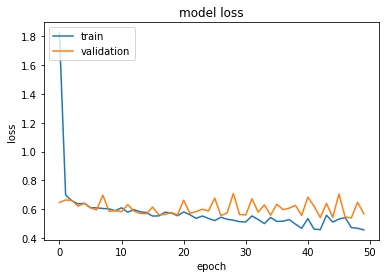

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 2. Increasing hidden neurons

In [ ]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              154141696 
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025      
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 3s 2ms/step - loss: 1.3721 - accuracy: 0.5273 - val_loss: 0.9192 - val_accuracy: 0.5609
Epoch 2/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6875 - accuracy: 0.6021 - val_loss: 0.6253 - val_accuracy: 0.6671
Epoch 3/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6374 - accuracy: 0.6598 - val_loss: 0.6478 - val_accuracy: 0.5935
Epoch 4/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6672 - accuracy: 0.6118 - val_loss: 0.6280 - val_accuracy: 0.6473
Epoch 5/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6307 - accuracy: 0.6422 - val_loss: 0.6679 - val_accuracy: 0.6006
Epoch 6/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6043 - accuracy: 0.6731 - val_loss: 0.6163 - val_accuracy: 0.6643
Epoch 7/50
1646/1646 [==============================] - 3s 2ms/step - loss: 0.6018 - accu

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.6572237960339944 %


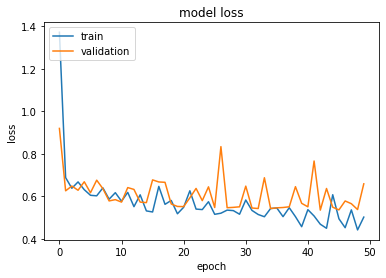

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 3. Increasing hidden layers

In [ ]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6750 - accuracy: 0.5844 - val_loss: 0.6793 - val_accuracy: 0.5609
Epoch 2/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6589 - accuracy: 0.5942 - val_loss: 0.6563 - val_accuracy: 0.5751
Epoch 3/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6489 - accuracy: 0.6160 - val_loss: 0.6447 - val_accuracy: 0.6487
Epoch 4/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6397 - accuracy: 0.6397 - val_loss: 0.6396 - val_accuracy: 0.6431
Epoch 5/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6326 - accuracy: 0.6519 - val_loss: 0.6329 - val_accuracy: 0.6431
Epoch 6/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6274 - accuracy: 0.6574 - val_loss: 0.6264 - val_accuracy: 0.6785
Epoch 7/50
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6208 - accu

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7067988668555241 %


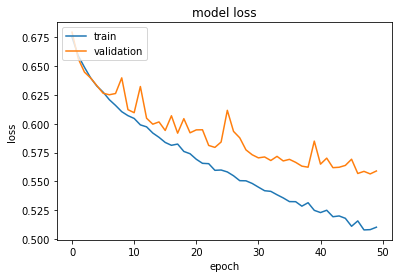

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 4. Increasing number of epochs

In [ ]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.8439 - accuracy: 0.5729 - val_loss: 0.6718 - val_accuracy: 0.5609
Epoch 2/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6492 - accuracy: 0.6203 - val_loss: 0.6624 - val_accuracy: 0.5892
Epoch 3/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6334 - accuracy: 0.6507 - val_loss: 0.6154 - val_accuracy: 0.6813
Epoch 4/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6147 - accuracy: 0.6847 - val_loss: 0.5996 - val_accuracy: 0.6884
Epoch 5/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6308 - accuracy: 0.6440 - val_loss: 0.5961 - val_accuracy: 0.6898
Epoch 6/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5851 - accuracy: 0.7132 - val_loss: 0.5895 - val_accuracy: 0.6898
Epoch 7/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6159

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.6968838526912181 %


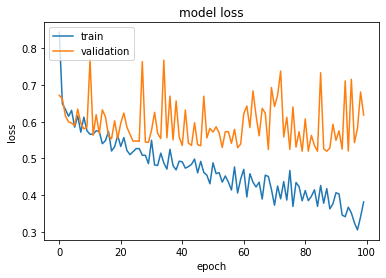

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 5. Changing the optimizer

In [ ]:
# importing adam optimizer from keras optimizer module 
from keras.optimizers import Adam

In [ ]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(lr=1e-5)

In [ ]:
# change optimizer
model=Sequential()

model.add(InputLayer(input_shape=(224*224*3,)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
# model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6808 - accuracy: 0.5674 - val_loss: 0.6636 - val_accuracy: 0.5623
Epoch 2/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6523 - accuracy: 0.6416 - val_loss: 0.6462 - val_accuracy: 0.6147
Epoch 3/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6306 - accuracy: 0.6525 - val_loss: 0.6247 - val_accuracy: 0.6742
Epoch 4/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6191 - accuracy: 0.6756 - val_loss: 0.6157 - val_accuracy: 0.6756
Epoch 5/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.6083 - accuracy: 0.6896 - val_loss: 0.6075 - val_accuracy: 0.6827
Epoch 6/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5995 - accuracy: 0.6974 - val_loss: 0.6018 - val_accuracy: 0.6856
Epoch 7/100
1646/1646 [==============================] - 2s 1ms/step - loss: 0.5901

In [ ]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, model.predict_classes(X_valid)[:, 0]), '%')

Accuracy on validation set: 0.7195467422096318 %


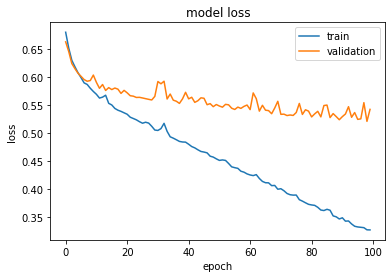

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

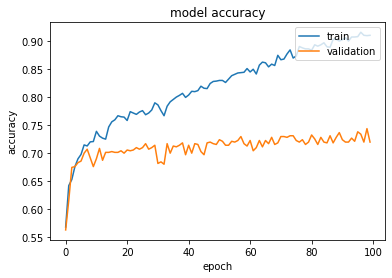

In [ ]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()